In [1]:
import tensorflow as tf
import numpy as plt
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D

In [3]:
data=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=data.load_data()

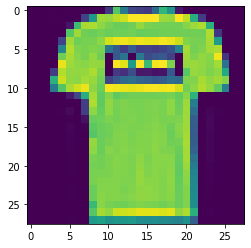

In [4]:
plt.imshow(x_train[1])

In [5]:

print(type(x_train))

<class 'numpy.ndarray'>


In [6]:
rows=len(x_train[0])
cols=len(x_train[0][0])

In [7]:
rows,cols

(28, 28)

In [8]:
##Reshaping the data to feed into the conv2d layers
x_train=x_train.reshape(len(x_train),rows,cols,1)
x_train=x_train/255.0
x_test=x_test.reshape(len(x_test),rows,cols,1)
x_test=x_test/255.0

In [9]:
model=tf.keras.models.Sequential(
    [Conv2D(64,(3,3),activation='relu',input_shape=(rows,cols,1)),
     MaxPooling2D((2,2)),
     Conv2D(64,(3,3),activation='relu'),
     MaxPooling2D((2,2)),
     Flatten(),
     Dense(128,activation='relu'),
     Dense(10,activation='softmax')
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.6047 - accuracy: 0.7800
Epoch 2/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3058 - accuracy: 0.8877
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2527 - accuracy: 0.9063
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2160 - accuracy: 0.9196
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1906 - accuracy: 0.9292


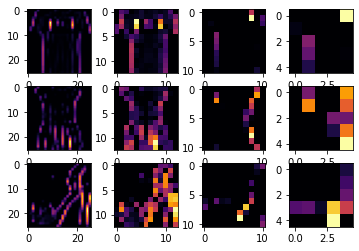

In [19]:
f,axarr=plt.subplots(3,4)
img_1=1
img_2=3
img_3=9
conv_num=4
from tensorflow.keras import models
layer_outputs=[x.output for x in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)
for x in range(0,4):
  f1=activation_model.predict(x_train[img_1].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,conv_num],cmap='inferno')
  axarr[0,x].grid(False)

  f2=activation_model.predict(x_train[img_2].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,conv_num],cmap='inferno')
  axarr[1,x].grid(False)

  f3=activation_model.predict(x_train[img_3].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,conv_num],cmap='inferno')
  axarr[2,x].grid(False)